In [1]:
from vnpy.app.spread_trading.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.spread_trading.strategies.statistical_arbitrage_strategy import (
    StatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_arbitrage_strategy import (
    BmArbitrageStrategy
)

from vnpy.app.spread_trading.strategies.basic_spread_strategy import (
    BasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_spread_strategy import (
    BmBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.spread_statistical_arbitrage_strategy import (
    SpreadStatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_multi_basic_spread_strategy import (
    BmMultiBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_date_spread_strategy import (
    BmBasicDateSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_q_date_spread_strategy import (
    BmQDateSpreadStrategy
)
from vnpy.app.spread_trading.strategies.spread_rate_strategy import (
    SpreadRateStrategy
)
from vnpy.app.spread_trading.base import LegData, SpreadData
from datetime import datetime


In [2]:
spread = SpreadData(
    name="BM",
    legs=[LegData("XBTH20.BITMEX"), LegData("XBTZ19.BITMEX")],
    price_multipliers={"XBTH20.BITMEX": 1, "XBTZ19.BITMEX": -1},
    trading_multipliers={"XBTH20.BITMEX": 1, "XBTZ19.BITMEX": -1},
    active_symbol="XBTH20.BITMEX",
    inverse_contracts={"XBTH20.BITMEX": False, "XBTZ19.BITMEX": False}, # 正向
    min_volume=1
)

In [3]:
engine = BacktestingEngine()
engine.set_parameters(
    spread=spread,
    interval="1m",
    start=datetime(2019, 9, 13),
    end=datetime(2019, 12, 27),
    rate=0.00075,
    slippage=0.5,
    size=1,
    pricetick=0.2,
    capital=1_000_000,    
)




# engine.add_strategy(StatisticalArbitrageStrategy, {})
# engine.add_strategy(SpreadStatisticalArbitrageStrategy, {}) #添加boll 差价 判读开仓

# engine.add_strategy(BmArbitrageStrategy, {})
# engine.add_strategy(BasicSpreadStrategy , {})
# engine.add_strategy(BmBasicSpreadStrategy, {"short_price": 150, "cover_price" : 50}) # 只远期开空，近期开多 符合平仓条件后，平空 平多
# 只远期开空，近期开多 添添加最终平仓日期 符合平仓条件后，平空 平多
# engine.add_strategy(BmQDateSpreadStrategy, {"short_rate": 1.3, "cover_rate" : 0.3, "end_date": "2019-3-29", "end_days": 1}) 
engine.add_strategy(SpreadRateStrategy, {"short_rate": 1.3, "cover_rate" : 0.4, "end_date": "2019-12-27", "end_days": 1}) 

# engine.add_strategy(BmMultiBasicSpreadStrategy, {}) # 主动腿多空循环开仓
# engine.add_strategy(BmBasicDateSpreadStrategy, {"short_price": 100, "cover_price" : 50, "start_days" : 3, "end_days": 5, "max_pos" : 50})


2020-01-08 18:51:38.329516	开始加载历史数据
2020-01-08 18:52:08.448938	历史数据加载完成，数据量：145513
2020-01-08 18:52:08.752019	策略初始化完成
2020-01-08 18:52:08.752193	开始回放历史数据
2020-01-08 18:52:11.459102	历史数据回放结束
2020-01-08 18:52:11.459509	开始计算逐日盯市盈亏
2020-01-08 18:52:11.462074	逐日盯市盈亏计算完成
2020-01-08 18:52:11.462439	开始计算策略统计指标
2020-01-08 18:52:11.474149	------------------------------
2020-01-08 18:52:11.474183	首个交易日：	2019-09-23
2020-01-08 18:52:11.474198	最后交易日：	2019-12-23
2020-01-08 18:52:11.474211	总交易日：	92
2020-01-08 18:52:11.474225	盈利交易日：	44
2020-01-08 18:52:11.474238	亏损交易日：	35
2020-01-08 18:52:11.474256	起始资金：	1,000,000.00
2020-01-08 18:52:11.474273	结束资金：	1,130,606.59
2020-01-08 18:52:11.474288	总收益率：	13.06%
2020-01-08 18:52:11.474302	年化收益：	34.07%
2020-01-08 18:52:11.474488	最大回撤: 	-18,613.20
2020-01-08 18:52:11.474508	百分比最大回撤: -1.79%
2020-01-08 18:52:11.474523	最长回撤天数: 	10
2020-01-08 18:52:11.474537	总盈亏：	130,606.59
2020-01-08 18:52:11.474550	总手续费：	133.41
2020-01-08 18:52:11.474566	总滑点：	1,300.00
2020-01-08 18:5

/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:378: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


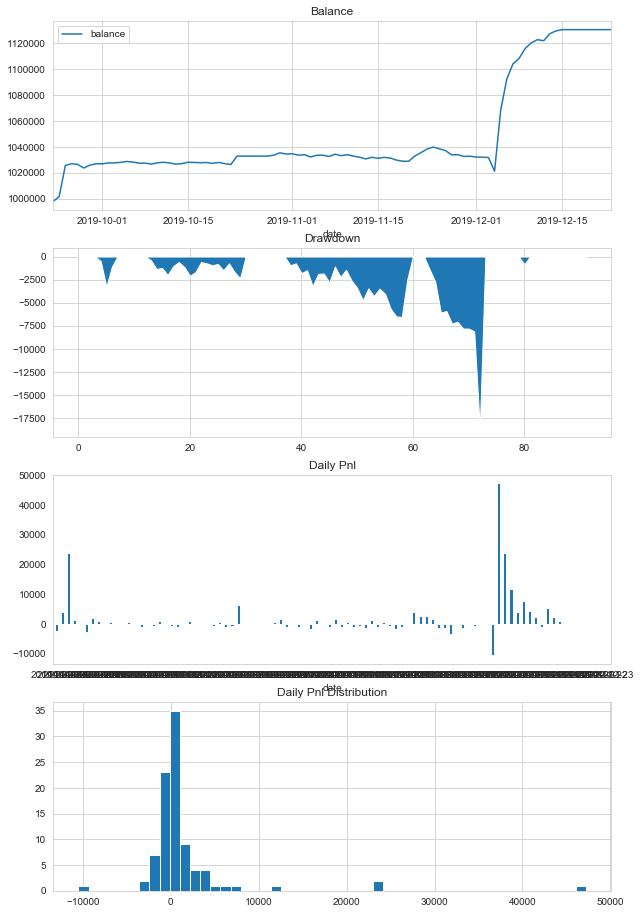

In [4]:
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [5]:
for trade in engine.trades.values():
    print(trade.orderid, trade.tradeid, trade.direction, trade.price, trade.spread_rate, trade.volume, trade.time)
for trade in engine.trades.values():
    print(trade)

1 1 Direction.SHORT 143.6 1.395167954887949 100.0 2019-09-23 00:01:00
2 2 Direction.LONG 11.0 0.12926728949997063 100.0 2019-09-25 03:06:00
3 3 Direction.SHORT 113.6 1.3433542431056928 100.0 2019-09-25 03:07:00
4 4 Direction.LONG 8.0 0.09532888465204957 100.0 2019-09-25 04:27:00
5 5 Direction.SHORT 113.6 1.3124421831637372 100.0 2019-09-25 06:19:00
6 6 Direction.LONG 19.6 0.25600630169358013 100.0 2019-10-23 20:42:00
7 7 Direction.SHORT 123.6 1.3039117352056169 100.0 2019-10-28 22:45:00
8 8 Direction.LONG 7.0 0.09618687736173136 100.0 2019-12-04 13:18:00
9 9 Direction.SHORT 169.0 2.3464074973967373 100.0 2019-12-04 20:55:00
10 10 Direction.LONG 17.6 0.24069871398115675 100.0 2019-12-05 05:22:00
11 11 Direction.SHORT 107.6 1.4625850340136055 100.0 2019-12-05 16:12:00
12 12 Direction.LONG 16.4 0.2212092773830272 100.0 2019-12-05 23:23:00
13 13 Direction.SHORT 97.0 1.3151650735543352 100.0 2019-12-06 00:18:00
14 14 Direction.LONG 29.0 0.39154796462566666 100.0 2019-12-06 00:59:00
15 15 Di

In [6]:
setting = OptimizationSetting()


setting.set_target("total_return")
# setting.set_target("sharpe_ratio")
# setting.set_target("return_drawdown_ratio")
# setting.set_target("daily_net_pnl")



setting.add_parameter("cover_rate", 0.1, 1.0, 0.1)
setting.add_parameter("short_rate", 1.0, 4.0, 0.1)
setting.add_parameter("end_date", "2019-12-27")
print(setting.__dict__)
# setting.add_parameter("start_days", 0, 5, 1)
# setting.add_parameter("short_price", 0, 5, 1)


# setting.add_parameter("atr_ma_length", 10, 30, 1)

engine.run_ga_optimization(setting)
# engine.run_optimization(setting)

{'params': {'cover_rate': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999], 'short_rate': [1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000004, 1.5000000000000004, 1.6000000000000005, 1.7000000000000006, 1.8000000000000007, 1.9000000000000008, 2.000000000000001, 2.100000000000001, 2.200000000000001, 2.300000000000001, 2.4000000000000012, 2.5000000000000013, 2.6000000000000014, 2.7000000000000015, 2.8000000000000016, 2.9000000000000017, 3.0000000000000018, 3.100000000000002, 3.200000000000002, 3.300000000000002, 3.400000000000002, 3.500000000000002, 3.6000000000000023, 3.7000000000000024, 3.8000000000000025, 3.9000000000000026], 'end_date': ['2019-12-27']}, 'target_name': 'total_return'}
2020-01-08 18:52:15.028122	参数优化空间：300
2020-01-08 18:52:15.028158	每代族群总数：100
2020-01-08 18:52:15.028174	优良筛选个数：80
2020-01-08 18:52:15.028274	迭代次数：30
2020-01-08 18:52:15.028302	交叉概率：95%
2020-01-08 18:52:15.028324	突变概率：5%
2020-

/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:378: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


2020-01-08 18:52:18.339281	策略初始化完成
2020-01-08 18:52:18.339387	开始回放历史数据
2020-01-08 18:52:21.159203	历史数据回放结束
2020-01-08 18:52:21.159449	开始计算逐日盯市盈亏
2020-01-08 18:52:21.161948	逐日盯市盈亏计算完成
2020-01-08 18:52:21.162164	开始计算策略统计指标
2020-01-08 18:52:21.168437	开始加载历史数据
2020-01-08 18:52:21.168673	历史数据加载完成，数据量：145513
2020-01-08 18:52:21.431547	策略初始化完成
2020-01-08 18:52:21.431701	开始回放历史数据
2020-01-08 18:52:24.307179	历史数据回放结束
2020-01-08 18:52:24.307330	开始计算逐日盯市盈亏
2020-01-08 18:52:24.309807	逐日盯市盈亏计算完成
2020-01-08 18:52:24.309949	开始计算策略统计指标
2020-01-08 18:52:24.315930	开始加载历史数据
2020-01-08 18:52:24.316129	历史数据加载完成，数据量：145513
2020-01-08 18:52:24.581756	策略初始化完成
2020-01-08 18:52:24.581882	开始回放历史数据
2020-01-08 18:52:27.446309	历史数据回放结束
2020-01-08 18:52:27.446469	开始计算逐日盯市盈亏
2020-01-08 18:52:27.449114	逐日盯市盈亏计算完成
2020-01-08 18:52:27.449335	开始计算策略统计指标
2020-01-08 18:52:27.455768	开始加载历史数据
2020-01-08 18:52:27.455973	历史数据加载完成，数据量：145513
2020-01-08 18:52:27.739533	策略初始化完成
2020-01-08 18:52:27.739664	开始回放历史数据
2020-01-08 18:52:

/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:406: RuntimeWarning: divide by zero encountered in double_scalars
  return_drawdown_ratio = -total_return / max_ddpercent


2020-01-08 18:52:58.180863	策略初始化完成
2020-01-08 18:52:58.181002	开始回放历史数据
2020-01-08 18:53:00.873569	历史数据回放结束
2020-01-08 18:53:00.873714	开始计算逐日盯市盈亏
2020-01-08 18:53:00.876104	逐日盯市盈亏计算完成
2020-01-08 18:53:00.876359	开始计算策略统计指标
2020-01-08 18:53:00.882964	开始加载历史数据
2020-01-08 18:53:00.883217	历史数据加载完成，数据量：145513
2020-01-08 18:53:01.146317	策略初始化完成
2020-01-08 18:53:01.146465	开始回放历史数据
2020-01-08 18:53:03.855408	历史数据回放结束
2020-01-08 18:53:03.855552	开始计算逐日盯市盈亏
2020-01-08 18:53:03.857733	逐日盯市盈亏计算完成
2020-01-08 18:53:03.858058	开始计算策略统计指标
2020-01-08 18:53:03.864778	开始加载历史数据
2020-01-08 18:53:03.865043	历史数据加载完成，数据量：145513
2020-01-08 18:53:04.130651	策略初始化完成
2020-01-08 18:53:04.130802	开始回放历史数据
2020-01-08 18:53:06.798236	历史数据回放结束
2020-01-08 18:53:06.798436	开始计算逐日盯市盈亏
2020-01-08 18:53:06.800647	逐日盯市盈亏计算完成
2020-01-08 18:53:06.800913	开始计算策略统计指标
2020-01-08 18:53:06.806948	开始加载历史数据
2020-01-08 18:53:06.807144	历史数据加载完成，数据量：145513
2020-01-08 18:53:07.071725	策略初始化完成
2020-01-08 18:53:07.071825	开始回放历史数据
2020-01-08 18:53:

2020-01-08 18:54:22.377770	策略初始化完成
2020-01-08 18:54:22.377961	开始回放历史数据
2020-01-08 18:54:25.147017	历史数据回放结束
2020-01-08 18:54:25.147170	开始计算逐日盯市盈亏
2020-01-08 18:54:25.149352	逐日盯市盈亏计算完成
2020-01-08 18:54:25.149566	开始计算策略统计指标
2020-01-08 18:54:25.155765	开始加载历史数据
2020-01-08 18:54:25.155924	历史数据加载完成，数据量：145513
2020-01-08 18:54:25.417390	策略初始化完成
2020-01-08 18:54:25.417531	开始回放历史数据
2020-01-08 18:54:28.091208	历史数据回放结束
2020-01-08 18:54:28.091434	开始计算逐日盯市盈亏
2020-01-08 18:54:28.096653	逐日盯市盈亏计算完成
2020-01-08 18:54:28.096866	开始计算策略统计指标
2020-01-08 18:54:28.108327	开始加载历史数据
2020-01-08 18:54:28.108603	历史数据加载完成，数据量：145513
2020-01-08 18:54:28.379478	策略初始化完成
2020-01-08 18:54:28.379574	开始回放历史数据
2020-01-08 18:54:31.159649	历史数据回放结束
2020-01-08 18:54:31.159803	开始计算逐日盯市盈亏
2020-01-08 18:54:31.162012	逐日盯市盈亏计算完成
2020-01-08 18:54:31.162228	开始计算策略统计指标
2020-01-08 18:54:31.169055	开始加载历史数据
2020-01-08 18:54:31.169213	历史数据加载完成，数据量：145513
2020-01-08 18:54:31.438620	策略初始化完成
2020-01-08 18:54:31.438761	开始回放历史数据
2020-01-08 18:54:

2020-01-08 18:55:44.928022	策略初始化完成
2020-01-08 18:55:44.928171	开始回放历史数据
2020-01-08 18:55:47.870405	历史数据回放结束
2020-01-08 18:55:47.871155	开始计算逐日盯市盈亏
2020-01-08 18:55:47.896597	逐日盯市盈亏计算完成
2020-01-08 18:55:47.897005	开始计算策略统计指标
2020-01-08 18:55:47.909438	开始加载历史数据
2020-01-08 18:55:47.909955	历史数据加载完成，数据量：145513
2020-01-08 18:55:48.202798	策略初始化完成
2020-01-08 18:55:48.202947	开始回放历史数据
2020-01-08 18:55:50.911781	历史数据回放结束
2020-01-08 18:55:50.911941	开始计算逐日盯市盈亏
2020-01-08 18:55:50.914207	逐日盯市盈亏计算完成
2020-01-08 18:55:50.914420	开始计算策略统计指标
2020-01-08 18:55:50.920467	开始加载历史数据
2020-01-08 18:55:50.920669	历史数据加载完成，数据量：145513
2020-01-08 18:55:51.193693	策略初始化完成
2020-01-08 18:55:51.193851	开始回放历史数据
2020-01-08 18:55:54.147450	历史数据回放结束
2020-01-08 18:55:54.147559	开始计算逐日盯市盈亏
2020-01-08 18:55:54.150027	逐日盯市盈亏计算完成
2020-01-08 18:55:54.150153	开始计算策略统计指标
2020-01-08 18:55:54.156255	开始加载历史数据
2020-01-08 18:55:54.156393	历史数据加载完成，数据量：145513
2020-01-08 18:55:54.413897	策略初始化完成
2020-01-08 18:55:54.414038	开始回放历史数据
2020-01-08 18:55:

2020-01-08 18:57:06.828188	策略初始化完成
2020-01-08 18:57:06.828289	开始回放历史数据
2020-01-08 18:57:09.761936	历史数据回放结束
2020-01-08 18:57:09.762105	开始计算逐日盯市盈亏
2020-01-08 18:57:09.764393	逐日盯市盈亏计算完成
2020-01-08 18:57:09.764612	开始计算策略统计指标
2020-01-08 18:57:09.770883	开始加载历史数据
2020-01-08 18:57:09.771052	历史数据加载完成，数据量：145513
2020-01-08 18:57:10.032764	策略初始化完成
2020-01-08 18:57:10.032905	开始回放历史数据
2020-01-08 18:57:12.799071	历史数据回放结束
2020-01-08 18:57:12.799175	开始计算逐日盯市盈亏
2020-01-08 18:57:12.801733	逐日盯市盈亏计算完成
2020-01-08 18:57:12.802044	开始计算策略统计指标
2020-01-08 18:57:12.809307	开始加载历史数据
2020-01-08 18:57:12.809535	历史数据加载完成，数据量：145513
2020-01-08 18:57:13.087404	策略初始化完成
2020-01-08 18:57:13.087556	开始回放历史数据
2020-01-08 18:57:15.882503	历史数据回放结束
2020-01-08 18:57:15.882605	开始计算逐日盯市盈亏
2020-01-08 18:57:15.885219	逐日盯市盈亏计算完成
2020-01-08 18:57:15.885497	开始计算策略统计指标
2020-01-08 18:57:15.892505	开始加载历史数据
2020-01-08 18:57:15.892701	历史数据加载完成，数据量：145513
2020-01-08 18:57:16.161598	策略初始化完成
2020-01-08 18:57:16.161749	开始回放历史数据
2020-01-08 18:57:

2020-01-08 18:58:29.065595	策略初始化完成
2020-01-08 18:58:29.065690	开始回放历史数据
2020-01-08 18:58:31.776571	历史数据回放结束
2020-01-08 18:58:31.776672	开始计算逐日盯市盈亏
2020-01-08 18:58:31.779100	逐日盯市盈亏计算完成
2020-01-08 18:58:31.779238	开始计算策略统计指标
2020-01-08 18:58:31.785589	开始加载历史数据
2020-01-08 18:58:31.785746	历史数据加载完成，数据量：145513
2020-01-08 18:58:32.066556	策略初始化完成
2020-01-08 18:58:32.066682	开始回放历史数据
2020-01-08 18:58:34.764284	历史数据回放结束
2020-01-08 18:58:34.764431	开始计算逐日盯市盈亏
2020-01-08 18:58:34.766806	逐日盯市盈亏计算完成
2020-01-08 18:58:34.767030	开始计算策略统计指标
2020-01-08 18:58:34.773244	开始加载历史数据
2020-01-08 18:58:34.773366	历史数据加载完成，数据量：145513
2020-01-08 18:58:35.044896	策略初始化完成
2020-01-08 18:58:35.044998	开始回放历史数据
2020-01-08 18:58:37.752764	历史数据回放结束
2020-01-08 18:58:37.752914	开始计算逐日盯市盈亏
2020-01-08 18:58:37.755038	逐日盯市盈亏计算完成
2020-01-08 18:58:37.755294	开始计算策略统计指标
2020-01-08 18:58:37.761620	开始加载历史数据
2020-01-08 18:58:37.761826	历史数据加载完成，数据量：145513
2020-01-08 18:58:38.027328	策略初始化完成
2020-01-08 18:58:38.027473	开始回放历史数据
2020-01-08 18:58:

2020-01-08 18:59:54.378705	策略初始化完成
2020-01-08 18:59:54.378834	开始回放历史数据
2020-01-08 18:59:57.139627	历史数据回放结束
2020-01-08 18:59:57.139776	开始计算逐日盯市盈亏
2020-01-08 18:59:57.142092	逐日盯市盈亏计算完成
2020-01-08 18:59:57.142510	开始计算策略统计指标
2020-01-08 18:59:57.150658	开始加载历史数据
2020-01-08 18:59:57.150836	历史数据加载完成，数据量：145513
2020-01-08 18:59:57.429294	策略初始化完成
2020-01-08 18:59:57.429454	开始回放历史数据
2020-01-08 19:00:00.198561	历史数据回放结束
2020-01-08 19:00:00.198685	开始计算逐日盯市盈亏
2020-01-08 19:00:00.201578	逐日盯市盈亏计算完成
2020-01-08 19:00:00.201874	开始计算策略统计指标
2020-01-08 19:00:00.209207	开始加载历史数据
2020-01-08 19:00:00.209371	历史数据加载完成，数据量：145513
2020-01-08 19:00:00.482928	策略初始化完成
2020-01-08 19:00:00.483020	开始回放历史数据
2020-01-08 19:00:03.192161	历史数据回放结束
2020-01-08 19:00:03.192324	开始计算逐日盯市盈亏
2020-01-08 19:00:03.194632	逐日盯市盈亏计算完成
2020-01-08 19:00:03.194846	开始计算策略统计指标
2020-01-08 19:00:03.201196	开始加载历史数据
2020-01-08 19:00:03.201346	历史数据加载完成，数据量：145513
2020-01-08 19:00:03.462694	策略初始化完成
2020-01-08 19:00:03.462826	开始回放历史数据
2020-01-08 19:00:

2020-01-08 19:01:16.377797	策略初始化完成
2020-01-08 19:01:16.377954	开始回放历史数据
2020-01-08 19:01:19.183228	历史数据回放结束
2020-01-08 19:01:19.183369	开始计算逐日盯市盈亏
2020-01-08 19:01:19.186457	逐日盯市盈亏计算完成
2020-01-08 19:01:19.186787	开始计算策略统计指标
2020-01-08 19:01:19.194524	开始加载历史数据
2020-01-08 19:01:19.194726	历史数据加载完成，数据量：145513
2020-01-08 19:01:19.472912	策略初始化完成
2020-01-08 19:01:19.473056	开始回放历史数据
2020-01-08 19:01:22.183009	历史数据回放结束
2020-01-08 19:01:22.183148	开始计算逐日盯市盈亏
2020-01-08 19:01:22.186078	逐日盯市盈亏计算完成
2020-01-08 19:01:22.186219	开始计算策略统计指标
2020-01-08 19:01:22.192650	开始加载历史数据
2020-01-08 19:01:22.192833	历史数据加载完成，数据量：145513
2020-01-08 19:01:22.455522	策略初始化完成
2020-01-08 19:01:22.455666	开始回放历史数据
2020-01-08 19:01:25.197490	历史数据回放结束
2020-01-08 19:01:25.197639	开始计算逐日盯市盈亏
2020-01-08 19:01:25.200214	逐日盯市盈亏计算完成
2020-01-08 19:01:25.200435	开始计算策略统计指标
2020-01-08 19:01:25.208838	开始加载历史数据
2020-01-08 19:01:25.209070	历史数据加载完成，数据量：145513
2020-01-08 19:01:25.487618	策略初始化完成
2020-01-08 19:01:25.487716	开始回放历史数据
2020-01-08 19:01:

2020-01-08 19:02:31.608836	策略初始化完成
2020-01-08 19:02:31.608964	开始回放历史数据
2020-01-08 19:02:34.219247	历史数据回放结束
2020-01-08 19:02:34.219394	开始计算逐日盯市盈亏
2020-01-08 19:02:34.221998	逐日盯市盈亏计算完成
2020-01-08 19:02:34.222230	开始计算策略统计指标
2020-01-08 19:02:34.228635	开始加载历史数据
2020-01-08 19:02:34.228857	历史数据加载完成，数据量：145513
2020-01-08 19:02:34.482924	策略初始化完成
2020-01-08 19:02:34.482995	开始回放历史数据
2020-01-08 19:02:37.073694	历史数据回放结束
2020-01-08 19:02:37.073851	开始计算逐日盯市盈亏
2020-01-08 19:02:37.076189	逐日盯市盈亏计算完成
2020-01-08 19:02:37.076507	开始计算策略统计指标
15 	100   	[71.423892]  	[0.]         	[71.423892] 	[71.423892] 
2020-01-08 19:02:37.088700	开始加载历史数据
2020-01-08 19:02:37.088839	历史数据加载完成，数据量：145513
2020-01-08 19:02:37.350219	策略初始化完成
2020-01-08 19:02:37.350308	开始回放历史数据
2020-01-08 19:02:40.016466	历史数据回放结束
2020-01-08 19:02:40.016618	开始计算逐日盯市盈亏
2020-01-08 19:02:40.018865	逐日盯市盈亏计算完成
2020-01-08 19:02:40.019089	开始计算策略统计指标
2020-01-08 19:02:40.025717	开始加载历史数据
2020-01-08 19:02:40.025901	历史数据加载完成，数据量：145513
2020-01-08 19:02:40.288

2020-01-08 19:03:42.984435	策略初始化完成
2020-01-08 19:03:42.984583	开始回放历史数据
2020-01-08 19:03:45.620812	历史数据回放结束
2020-01-08 19:03:45.621406	开始计算逐日盯市盈亏
2020-01-08 19:03:45.623620	逐日盯市盈亏计算完成
2020-01-08 19:03:45.623902	开始计算策略统计指标
30 	100   	[71.423892]  	[0.]         	[71.423892] 	[71.423892] 
2020-01-08 19:03:45.631870	遗传算法优化完成，耗时690秒


[({'cover_rate': 0.9999999999999999,
   'short_rate': 1.0,
   'end_date': '2019-12-27'},
  71.423892,
  {})]